<a href="https://colab.research.google.com/github/gimangwai-tech/PENGOLAHAN-CITRA-DIGITAL-Semester-5/blob/main/Tugas_Minggu_4_Negative%2C_Gamma_dan_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

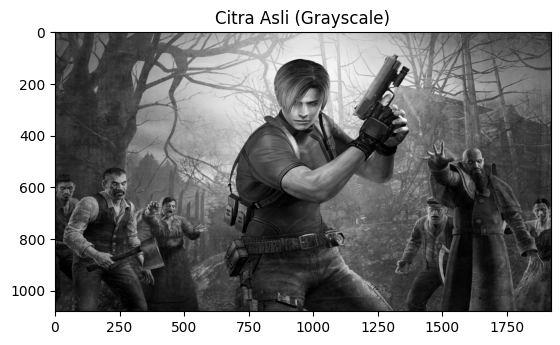

In [48]:
import cv2
import matplotlib.pyplot as plt

# Membaca gambar dalam mode grayscale
img = cv2.imread('leon.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli (Grayscale)')
plt.show()




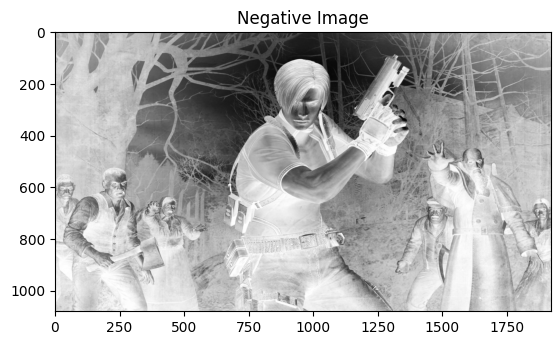

In [49]:
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title('Negative Image')
plt.show()

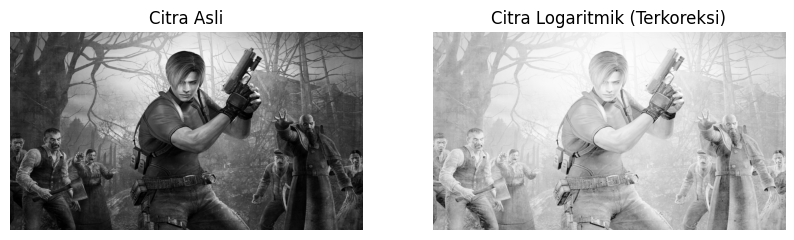

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra grayscale
img = cv2.imread('leon.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Gambar tidak ditemukan!")

# Ubah ke float agar tidak hilang presisi
img_float = img.astype(float)

# Rumus log transformasi
c = 255 / np.log(1 + np.max(img_float))
log_transform = c * np.log(1 + img_float)

# Normalisasi hasil ke 0–255
log_transform = cv2.normalize(log_transform, None, 0, 255, cv2.NORM_MINMAX)

# Ubah ke uint8 untuk ditampilkan
log_transform = np.uint8(log_transform)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Citra Logaritmik (Terkoreksi)')
plt.imshow(log_transform, cmap='gray')
plt.axis('off')

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

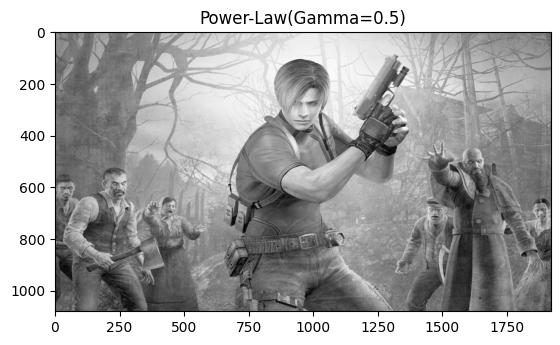

In [51]:
gamma = 0.5 # Ubah nilai gamma = 0.4, 0.6, 1.2, dst untuk eksperimen
c = 1
power_law = c * np.power(img / 255.0, gamma)
power_law = np.uint8(power_law * 255)

plt.imshow(power_law, cmap='gray')
plt.title(f'Power-Law(Gamma={gamma})')
plt.show

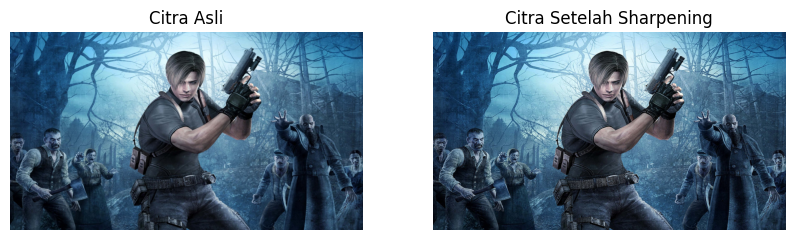

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('leon.jpg')

if img is None:
    raise ValueError("Gambar tidak ditemukan! Pastikan nama file benar dan berada di folder yang sama.")

# Konversi ke RGB untuk tampilan dengan matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Kernel sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Terapkan filter sharpening
sharpened = cv2.filter2D(img_rgb, -1, kernel_sharpen)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Setelah Sharpening')
plt.imshow(sharpened)
plt.axis('off')

plt.show()
